In [1]:
import pandas as pd
import requests
import os

Gathering:-

In [2]:
#gathering the image predictions spreadsheet
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [3]:
#saving the file by the last split string name, split tby '/'
with open(os.path.join(url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [2]:
#laoding the image predictions dat in dataframes
df = pd.read_table('image-predictions.tsv',sep='\t')

In [3]:
#loading the twitter archive in dataframes
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#downloading the twitter data by querying the twitter api about the tweet id found in the other spreadsheet

import tweepy
import json

#removing the keys after downloading the file
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#setting the wait limit so that no tweet is missed when the api reaches the request limit and the developer is informed of it
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [45]:
#writing  the twitter data in the file tweet_json 

#using try except block so that the code does not crash. This happens if the tweet is removed. It skips any missing tweet id by
#the continue keyword. It writes the json data in txt file using the json library. Adding a new line after each tweet detail.

with open('tweet_json.txt', 'w') as outfile:
    for i in df['tweet_id']:
        try:
                tweet = api.get_status(i,tweet_mode='extended')    
                json.dump(tweet._json, outfile)
                outfile.write('\n')
        except :
               continue

Rate limit reached. Sleeping for: 296
Rate limit reached. Sleeping for: 721


In [5]:
df_twt = pd.DataFrame()

In [6]:
#reading the file by loading the json data from the file line by line
#storing it in a dictionary format and transposing the table so that the keys become the columns in the dataframe

with open('tweet_json.txt') as f:
    contents = f.readlines()
    i = 0
    for content in contents:
        data = json.loads(content)
        temp = pd.DataFrame.from_dict(data,orient='index')
        temp = temp.transpose()
        df_twt = df_twt.append(pd.DataFrame(temp))

Assessing:-

In [7]:
#checking the image predictions data for issues
df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
#checking what the top are predictions are, for the tweets
df['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
#checking duplicates in the image predictions data
df['tweet_id'].duplicated().sum()

0

In [13]:
df1['in_reply_to_status_id'].unique()

array([             nan,   8.86266357e+17,   8.81607037e+17,
         8.79553827e+17,   8.70726203e+17,   8.63425646e+17,
         6.67152164e+17,   8.57156678e+17,   8.55818117e+17,
         8.56286004e+17,   8.55861584e+17,   8.55858536e+17,
         8.50328819e+17,   8.48212112e+17,   8.47606176e+17,
         7.59099524e+17,   8.40698300e+17,   8.38145499e+17,
         8.38085539e+17,   8.35245984e+17,   8.32087548e+17,
         8.31903044e+17,   8.26598365e+17,   8.23326389e+17,
         8.21152593e+17,   8.13127252e+17,   8.11627233e+17,
         7.33109485e+17,   8.01854331e+17,   8.00857954e+17,
         7.97123751e+17,   7.72743019e+17,   7.66711819e+17,
         7.63865175e+17,   7.50180499e+17,   7.47648654e+17,
         7.46885919e+17,   6.91416866e+17,   7.38411920e+17,
         7.29113531e+17,   7.07980066e+17,   7.03255936e+17,
         7.04485745e+17,   7.03041950e+17,   6.96488711e+17,
         6.75349384e+17,   6.70668383e+17,   6.93642232e+17,
         6.93572216e+17,

In [14]:
df1['retweeted_status_id'].unique()

array([             nan,   8.87473957e+17,   8.86053734e+17,
         8.30583321e+17,   8.78057613e+17,   8.78281511e+17,
         6.69000397e+17,   8.76850772e+17,   8.66334965e+17,
         8.68880398e+17,   8.73213776e+17,   8.72657584e+17,
         8.41077006e+17,   8.59196979e+17,   8.68552279e+17,
         8.65013420e+17,   8.66450706e+17,   8.37820168e+17,
         8.63062472e+17,   8.06629075e+17,   8.60563773e+17,
         8.60914485e+17,   7.61672994e+17,   8.39549326e+17,
         8.57061112e+17,   8.44704788e+17,   8.56330159e+17,
         8.42163533e+17,   8.55122533e+17,   8.31650052e+17,
         8.29374342e+17,   8.48289382e+17,   8.33124695e+17,
         8.32369877e+17,   8.47971000e+17,   7.56288534e+17,
         7.73308824e+17,   8.07106841e+17,   8.17423860e+17,
         8.40632337e+17,   6.67152164e+17,   8.39289919e+17,
         8.38905981e+17,   7.83839966e+17,   8.20749717e+17,
         8.37011345e+17,   8.36648149e+17,   8.17827839e+17,
         7.86963064e+17,

In [15]:
df_twt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 0
Data columns (total 28 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2067 non-null object
display_text_range               2067 non-null object
entities                         2067 non-null object
extended_entities                2067 non-null object
favorite_count                   2067 non-null object
favorited                        2067 non-null object
full_text                        2067 non-null object
geo                              0 non-null object
id                               2067 non-null object
id_str                           2067 non-null object
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null object
in_reply_to_status_id_str        23 non-null object
in_reply_to_user_id              23 non-null object
in_reply_to_user_id_str          23 non-null obje

In [16]:
df_twt

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Sun Nov 15 22:32:08 +0000 2015,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2556,False,Here we have a Japanese Irish Setter. Lost eye...,None,...,en,None,False,False,511,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Sun Nov 15 23:05:30 +0000 2015,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",129,False,This is a western brown Mitsubishi terrier. Up...,None,...,en,None,False,False,47,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Sun Nov 15 23:21:54 +0000 2015,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",125,False,Here is a very happy pup. Big fan of well-main...,None,...,en,None,False,False,44,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:04:52 +0000 2015,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",298,False,This is a purebred Piers Morgan. Loves to Netf...,None,...,en,None,False,False,141,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:24:50 +0000 2015,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",109,False,Here we have a 1949 1st generation vulpix. Enj...,None,...,en,None,False,False,40,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:30:50 +0000 2015,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666050754986266625, 'id_str'...",132,False,This is a truly beautiful English Wilson Staff...,None,...,en,None,False,False,59,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:35:11 +0000 2015,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666051848592334848, 'id_str'...",1209,False,This is an odd dog. Hard on the outside but lo...,None,...,en,None,False,False,844,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:49:46 +0000 2015,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666055517517848576, 'id_str'...",431,False,Here is a Siberian heavily armored polar bear ...,None,...,en,None,False,False,249,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:55:59 +0000 2015,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666057085227016192, 'id_str'...",295,False,My oh my. This is a rare blond Canadian terrie...,None,...,en,None,False,False,141,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 01:01:59 +0000 2015,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666058597072306176, 'id_str'...",111,False,Here is the Rand Paul of retrievers folks! He'...,None,...,en,None,False,False,57,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [17]:
#checking the extended entities column
df_twt['extended_entities'].head()

0    {'media': [{'id': 666020881337073664, 'id_str'...
0    {'media': [{'id': 666029276303482880, 'id_str'...
0    {'media': [{'id': 666033409081393153, 'id_str'...
0    {'media': [{'id': 666044217047650304, 'id_str'...
0    {'media': [{'id': 666049244999131136, 'id_str'...
Name: extended_entities, dtype: object

In [18]:
df_twt['retweeted'].unique()

array([False], dtype=object)

In [19]:
#Making copies of the original datatsets before cleaning

In [20]:
dfc = df.copy()

In [21]:
df1c = df1.copy()

In [22]:
df_twtc = df_twt.copy()

Cleaning

Define :-
Quality
-> The image predictions has has the p1 column data as non dog predictions.
-> The image predictions has has the p2 column data as non dog predictions.
-> The image predictions has has the p3 column data as non dog predictions.
These non dog predictions need to be removed as we are trying to predict the type of dog in the tweets

Code :-

In [23]:
#removing the non dog predictions
dfc = dfc[dfc['p1_dog']==True]

In [24]:
dfc = dfc[dfc['p2_dog']==True]

In [25]:
dfc = dfc[dfc['p3_dog']==True]

Test:-

In [31]:
dfc

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True


Define
Quality
->The twitter archive spreadsheet does not have the names in the name column. It has None as it's value.
->The twitter archive spreadsheet has names like a, an in the name column. It must be a typo.


Code:-

In [26]:
#removing rows with name field as None, a or an 
df1c = df1c[df1['name']!='None'] 

In [27]:
df1c = df1c[df1c['name']!='a']

In [28]:
df1c = df1c[df1c['name']!='an']

Test:-

In [32]:
df1c

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,None,None,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,None,None,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,None,None,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,None,None,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,None,None,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,None,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
8,890609185150312448,None,None,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,None,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,None,None,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,None,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,None,None,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,None,None,None,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,None,None,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,None,None,None,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


Define
Quality
->In the twitter api spreadsheet the retweeted value is false even though the value of retweet_count is more than 0.

Code:-

In [29]:
#setting the retweeted value as True for the fields having retweet count more than 0
df_twtc.loc[df_twtc['retweet_count'] > 0, 'retweeted'] = True

Test:-

In [33]:
df_twtc

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Sun Nov 15 22:32:08 +0000 2015,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2556,False,Here we have a Japanese Irish Setter. Lost eye...,None,...,en,None,False,False,511,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Sun Nov 15 23:05:30 +0000 2015,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",129,False,This is a western brown Mitsubishi terrier. Up...,None,...,en,None,False,False,47,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Sun Nov 15 23:21:54 +0000 2015,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",125,False,Here is a very happy pup. Big fan of well-main...,None,...,en,None,False,False,44,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:04:52 +0000 2015,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",298,False,This is a purebred Piers Morgan. Loves to Netf...,None,...,en,None,False,False,141,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:24:50 +0000 2015,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",109,False,Here we have a 1949 1st generation vulpix. Enj...,None,...,en,None,False,False,40,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:30:50 +0000 2015,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666050754986266625, 'id_str'...",132,False,This is a truly beautiful English Wilson Staff...,None,...,en,None,False,False,59,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:35:11 +0000 2015,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666051848592334848, 'id_str'...",1209,False,This is an odd dog. Hard on the outside but lo...,None,...,en,None,False,False,844,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:49:46 +0000 2015,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666055517517848576, 'id_str'...",431,False,Here is a Siberian heavily armored polar bear ...,None,...,en,None,False,False,249,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:55:59 +0000 2015,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666057085227016192, 'id_str'...",295,False,My oh my. This is a rare blond Canadian terrie...,None,...,en,None,False,False,141,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 01:01:59 +0000 2015,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666058597072306176, 'id_str'...",111,False,Here is the Rand Paul of retrievers folks! He'...,None,...,en,None,False,False,57,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


Define
Quality
->The twitter archive spreadsheet has Nan value for most of the rows for in_reply_to_status_id, in_reply_to_user_id.
->The twitter archive spreadsheet has Nan value for most of the rows for retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

Code:-

In [30]:
#filling the missing values with None
df1c = df1c.fillna('None')

Test:-

In [24]:
df1c

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,None,None,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,None,None,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,None,None,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,None,None,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,None,None,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,None,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
8,890609185150312448,None,None,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,None,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,None,None,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,None,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,None,None,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,None,None,None,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,None,None,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,None,None,None,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


Define:-
Tidiness
->The extended entities column of the twitter api table has multiple variables in it. The id and id_str. They need to be split up or the column needs to be removed as the dataframe already has id as column.

Code:-

In [25]:
#dropping the extended_entities column
df_twtc = df_twtc.drop('extended_entities',axis=1)

Test:-

In [26]:
df_twtc

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,...,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Sun Nov 15 22:32:08 +0000 2015,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...",2556,False,Here we have a Japanese Irish Setter. Lost eye...,None,666020888022790149,...,en,None,False,False,511,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Sun Nov 15 23:05:30 +0000 2015,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",129,False,This is a western brown Mitsubishi terrier. Up...,None,666029285002620928,...,en,None,False,False,47,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Sun Nov 15 23:21:54 +0000 2015,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...",125,False,Here is a very happy pup. Big fan of well-main...,None,666033412701032449,...,en,None,False,False,44,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:04:52 +0000 2015,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...",298,False,This is a purebred Piers Morgan. Loves to Netf...,None,666044226329800704,...,en,None,False,False,141,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:24:50 +0000 2015,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...",109,False,Here we have a 1949 1st generation vulpix. Enj...,None,666049248165822465,...,en,None,False,False,40,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:30:50 +0000 2015,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",132,False,This is a truly beautiful English Wilson Staff...,None,666050758794694657,...,en,None,False,False,59,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:35:11 +0000 2015,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...",1209,False,This is an odd dog. Hard on the outside but lo...,None,666051853826850816,...,en,None,False,False,844,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:49:46 +0000 2015,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",431,False,Here is a Siberian heavily armored polar bear ...,None,666055525042405380,...,en,None,False,False,249,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 00:55:59 +0000 2015,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions...",295,False,My oh my. This is a rare blond Canadian terrie...,None,666057090499244032,...,en,None,False,False,141,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
0,None,None,Mon Nov 16 01:01:59 +0000 2015,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...",111,False,Here is the Rand Paul of retrievers folks! He'...,None,666058600524156928,...,en,None,False,False,57,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


Define
Tidyness
->The twitter archive and the twitter api spreadsheet should be merged based on the tweet id as they both describe
the tweet details.

In [27]:
#merging the twitter archive table with the twitter api data
df_f1 = df1c.merge(df_twtc,left_on='tweet_id',right_on='id',how='inner')

In [28]:
df_f1

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source_y,truncated,user
0,892420643555336193,None,None,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,...,en,None,False,False,8446,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,None,None,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,...,en,None,False,False,6223,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,None,None,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,...,en,None,False,False,4125,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,None,None,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,...,en,None,False,False,8578,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,None,None,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,...,en,None,False,False,9307,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,890971913173991426,None,None,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,None,None,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,en,None,False,False,2051,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,890609185150312448,None,None,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,None,None,https://twitter.com/dog_rates/status/890609185...,...,en,None,False,False,4234,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,890240255349198849,None,None,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,None,None,https://twitter.com/dog_rates/status/890240255...,...,en,None,False,False,7342,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,890006608113172480,None,None,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,None,None,None,https://twitter.com/dog_rates/status/890006608...,...,en,None,False,False,7277,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,889880896479866881,None,None,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,None,None,None,https://twitter.com/dog_rates/status/889880896...,...,en,None,False,False,4934,True,NaN,"<a href=""http://twitter.com/download/iphone"" r...",F

Analysis

In [38]:
#merging the merged dataframe with the image predictions table
df_f2 = df_f1.merge(dfc,on='tweet_id',how='inner')

In [55]:
#saving the final dataset
df_f2.to_csv('twitter_archive_master.csv')

In [40]:
df_f2['retweet_count'].max()

60297

In [41]:
df_f2.loc[df_f2['retweet_count']==df_f2['retweet_count'].max()]['p1']

236    Chihuahua
Name: p1, dtype: object

In [42]:
df_f2.loc[df_f2['retweet_count']==df_f2['retweet_count'].min()]['p1']

894    curly-coated_retriever
Name: p1, dtype: object

In [46]:
df_f2.loc[df_f2['favorite_count']==df_f2['favorite_count'].max()]['p1']

62    French_bulldog
Name: p1, dtype: object

In [54]:
df_f2.loc[df_f2['favorite_count']==df_f2['favorite_count'].min()]['p1'][:1]

92    Staffordshire_bullterrier
Name: p1, dtype: object

In [47]:
d = df_f2[['favorite_count','p1']]

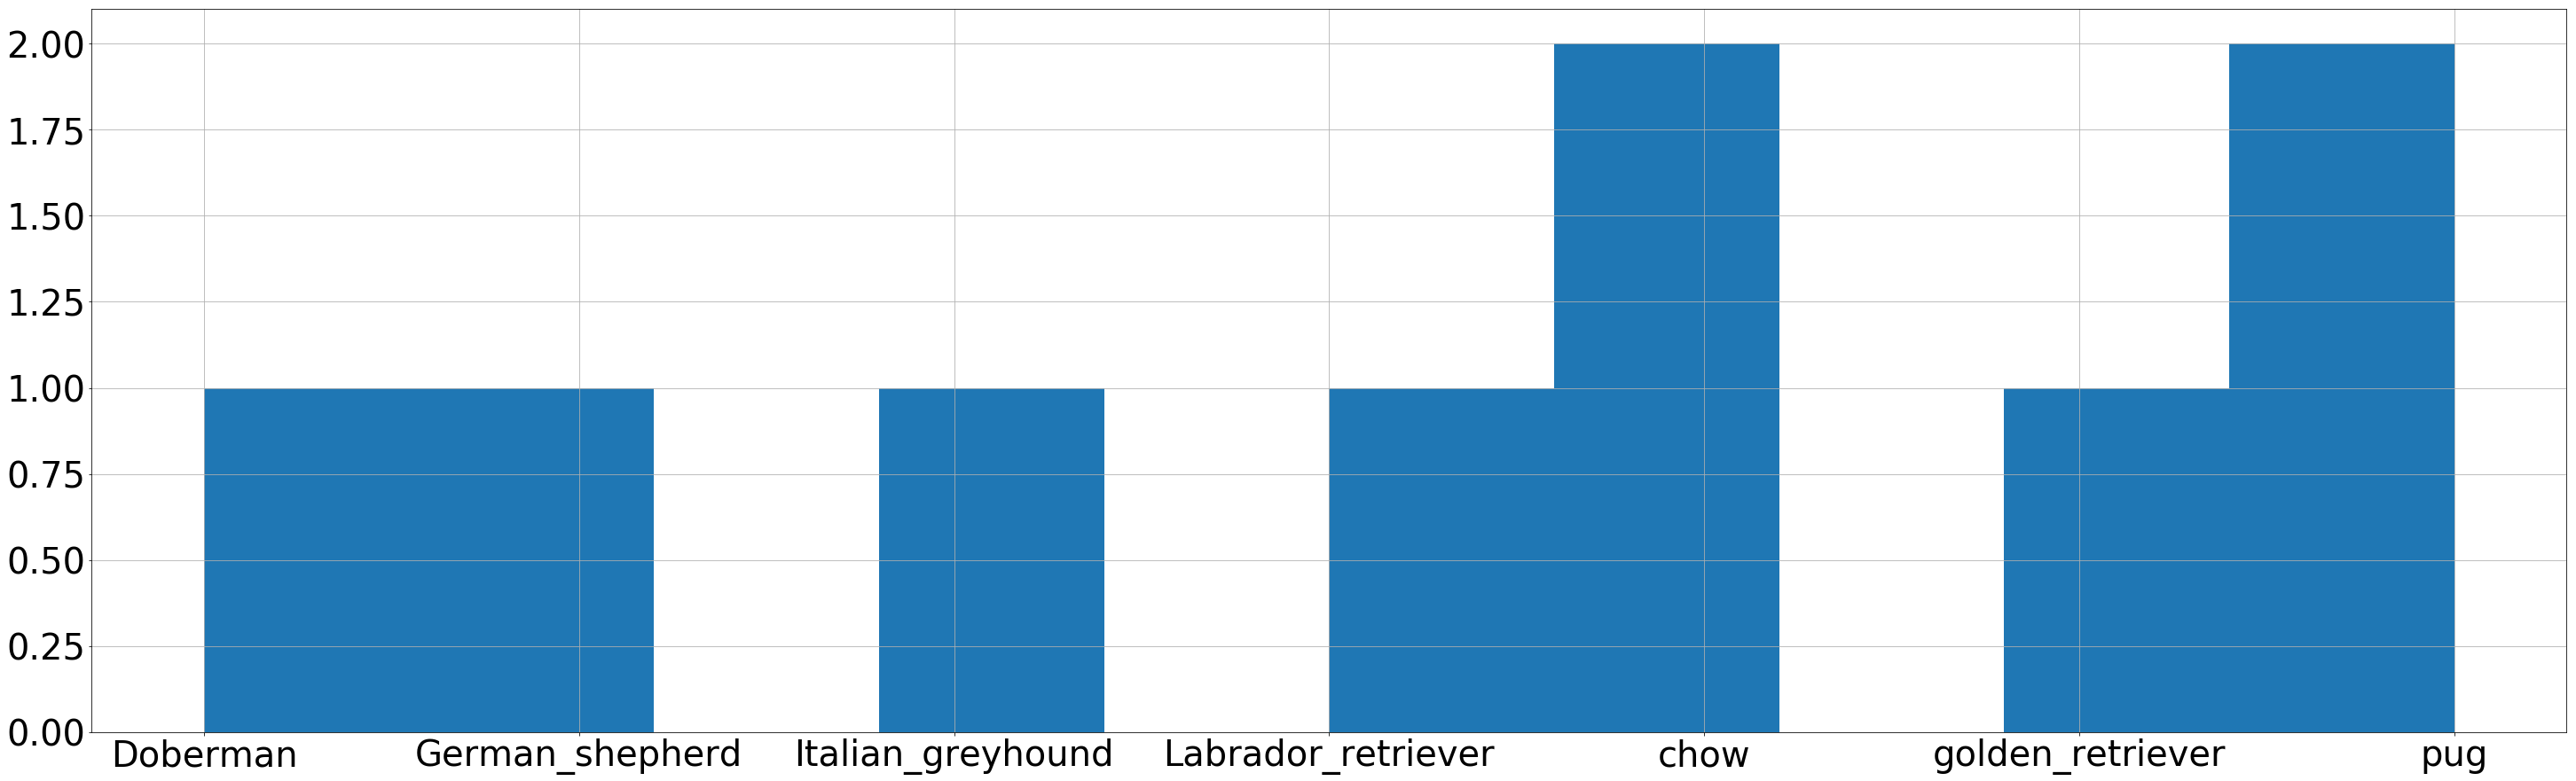

In [51]:
%matplotlib inline
d['p1'][18:27].hist(xlabelsize=40,ylabelsize=40,figsize=[50,15])

--The provided datasets and the data fetched by twitter api helped in analysing the most popular dog based on maximum retweets and max favourite count.
According to the image prediction data the dog to get the most retweet is chihuahua and the maximum favourite_count dog is french bulldog.
While the least popular dog having the least retweets is curly coated retriever.
One of the dog having the minimum favorite count is Staffordshire_bullterrier
The visualization shows some of the dogs and their respective comparitive favorite count scale in the y axis.